In [1]:
import os
import random
from shutil import copyfile

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

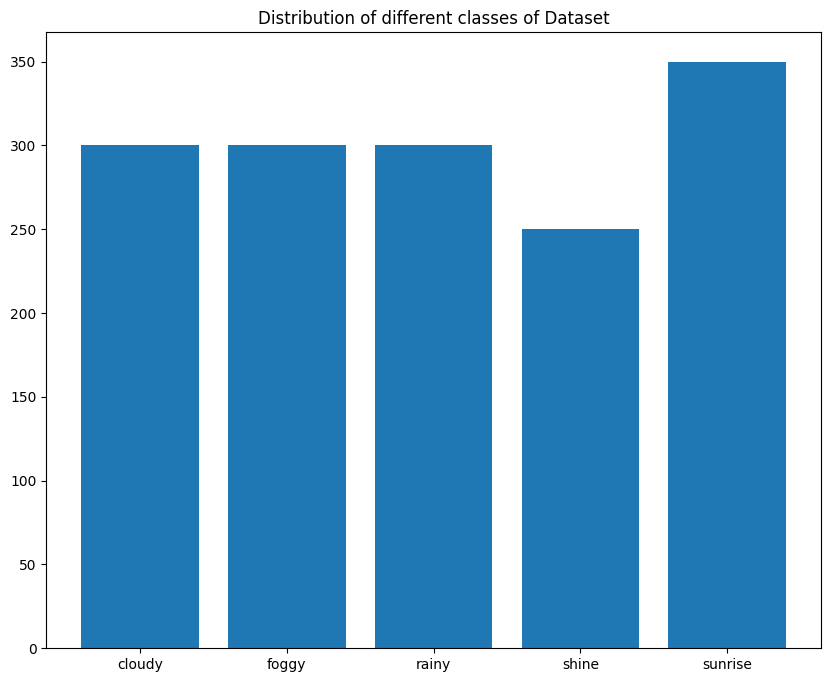

In [4]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('../dataset/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(10, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes of Dataset')
plt.show()

Found 300 images in folder cloudy
Found 284 images in folder foggy
Found 283 images in folder rainy
Found 250 images in folder shine
Found 349 images in folder sunrise


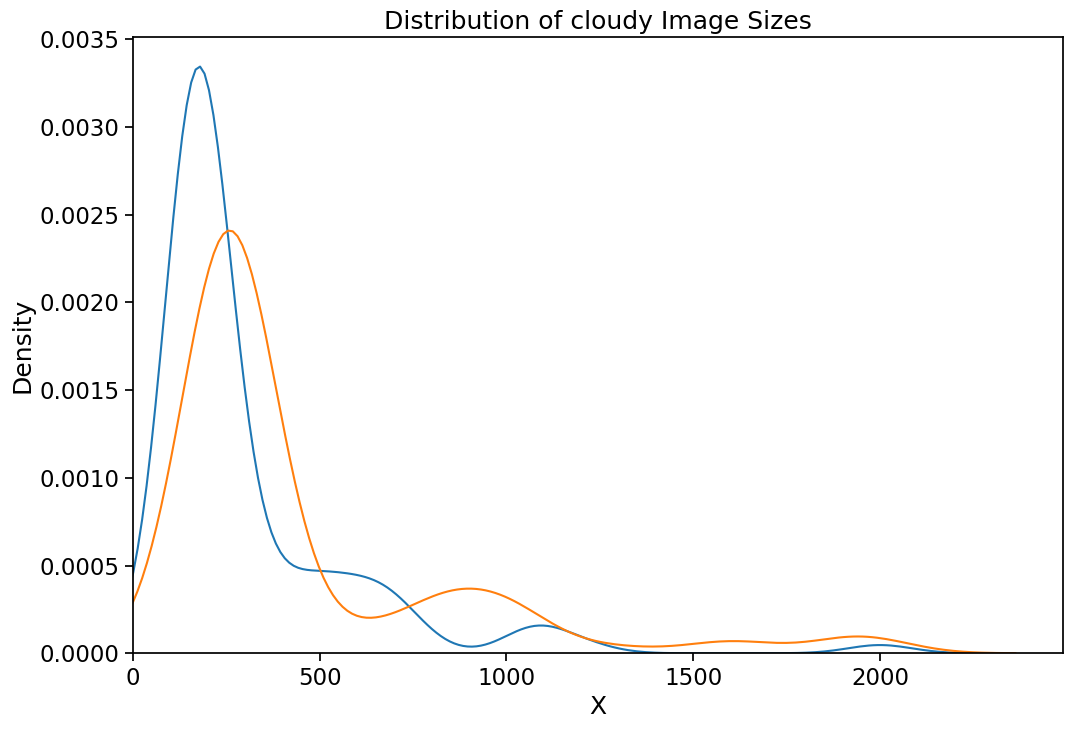

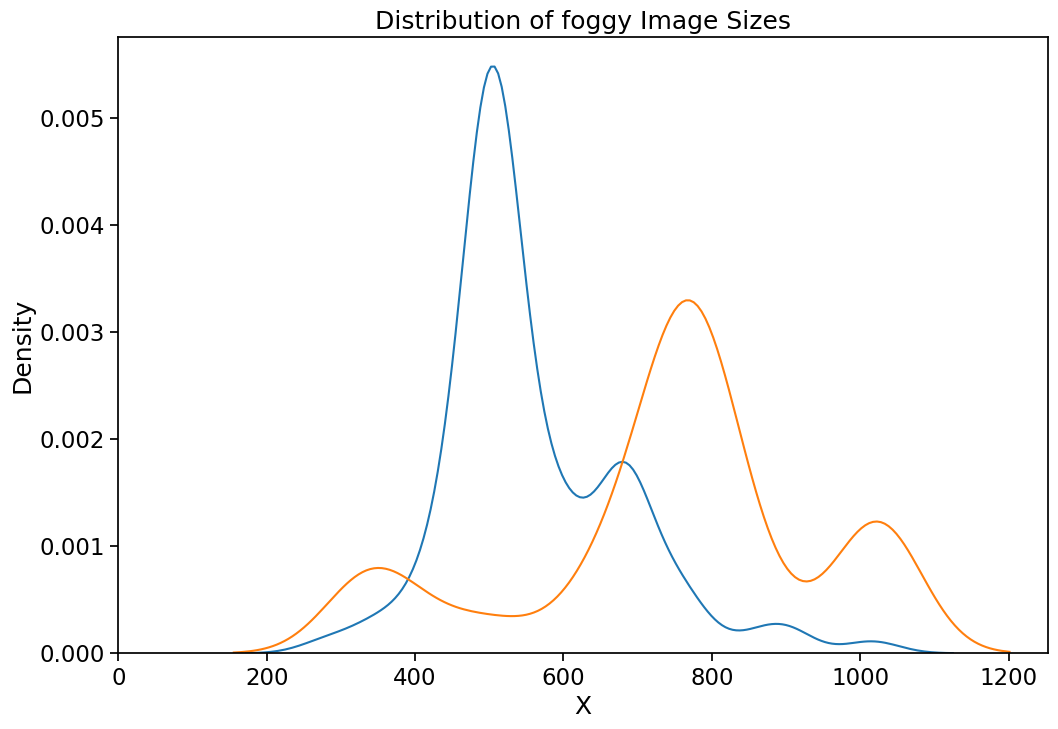

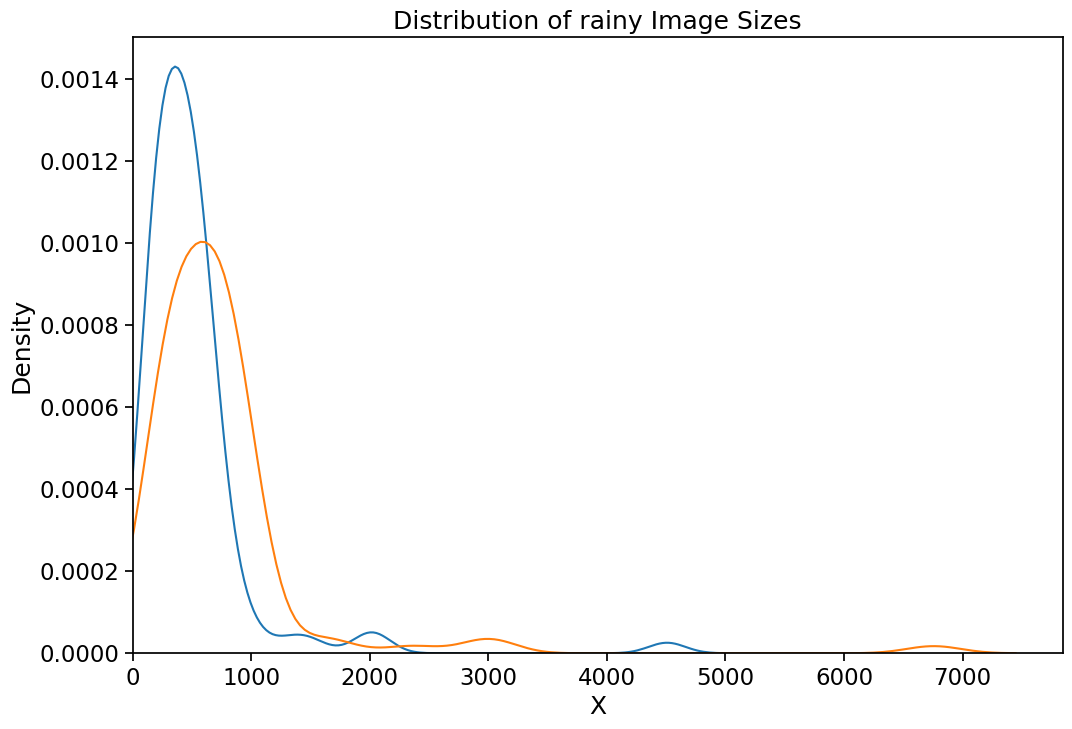

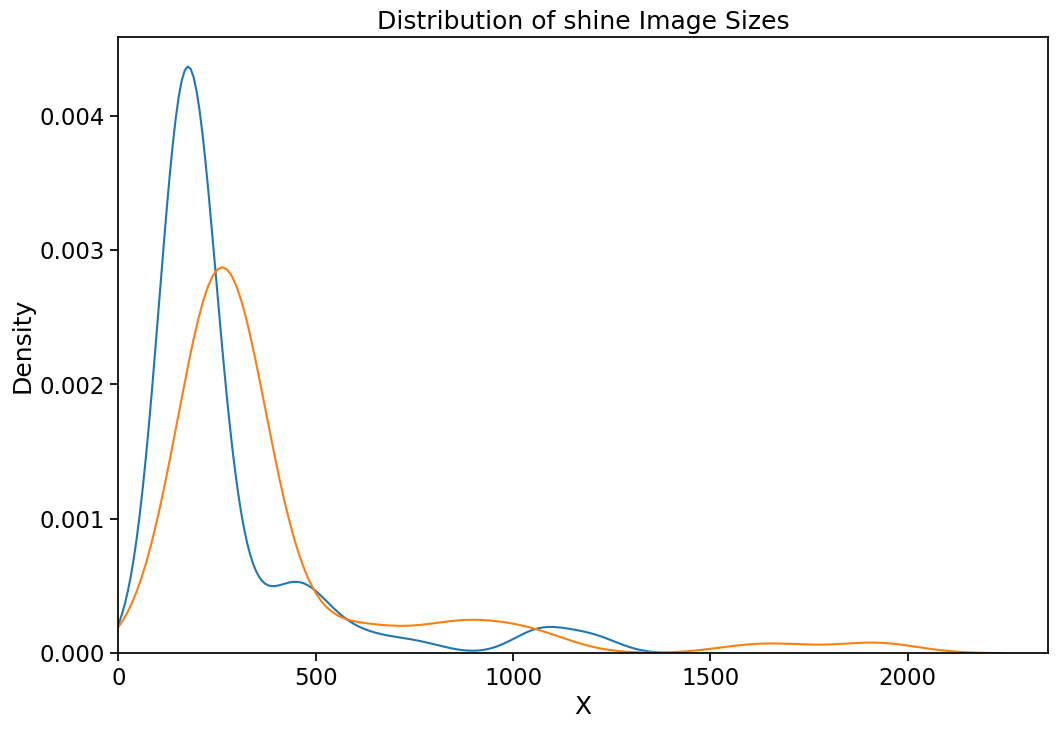

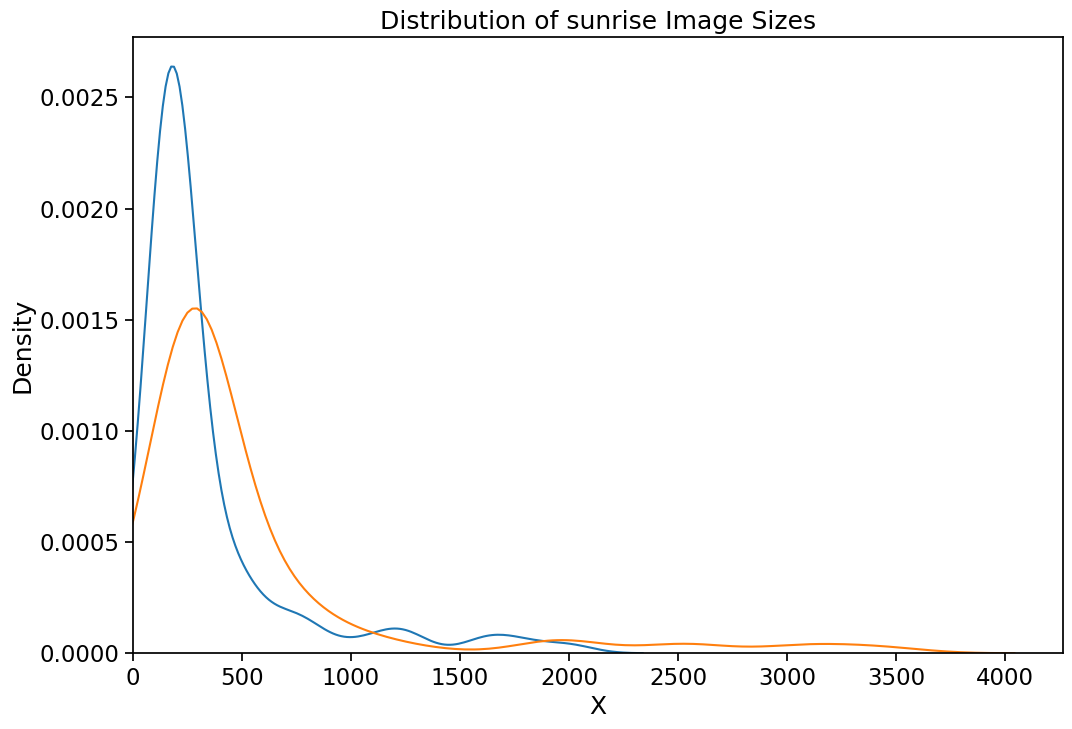

In [5]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

for i in image_folder:
    # mendapatkan list gambar di folder
    sample_images = list(pathlib.Path('../dataset/'+i+'/').rglob('*.jpg'))  
    
    if not sample_images:
        print(f"No images found for {i}")
        continue  # Skip kalau ga ada image
    
    print(f"Found {len(sample_images)} images in folder {i}")
    
    np.random.seed(42)
    rand_imgs = np.random.choice(sample_images, size=10*10, replace=False)  # biar ga oversample
    
    shapes = []
    for img in rand_imgs:
        try:
            shapes.append(imread(str(img)).shape)
        except Exception as e:
            print(f"Error reading image {img}: {e}")
            continue
    
    # buat df untuk dimensi X dan Y
    shapes_df = pd.DataFrame({
        'X': pd.Series(shapes).map(lambda s: s[0]), 
        'Y': pd.Series(shapes).map(lambda s: s[1])
    })
    
    plt.figure(figsize=(12, 8))
    sns.set_context("notebook", font_scale=1.5)
    sns.kdeplot(shapes_df['X'], bw_adjust=0.75)  
    sns.kdeplot(shapes_df['Y'], bw_adjust=0.75)
    plt.title(f'Distribution of {i} Image Sizes')
    ax = plt.gca()
    ax.set_xlim(0, ax.get_xlim()[1])

plt.show()


In [6]:
try:
    os.makedirs('../weather_pred/Data/training/cloudy', exist_ok=True)
    os.makedirs('../weather_pred/Data/training/foggy', exist_ok=True)
    os.makedirs('../weather_pred/Data/training/rainy', exist_ok=True)
    os.makedirs('../weather_pred/Data/training/shine', exist_ok=True)
    os.makedirs('../weather_pred/Data/training/sunrise', exist_ok=True)

    os.makedirs('../weather_pred/Data/validation/cloudy', exist_ok=True)
    os.makedirs('../weather_pred/Data/validation/foggy', exist_ok=True)
    os.makedirs('../weather_pred/Data/validation/rainy', exist_ok=True)
    os.makedirs('../weather_pred/Data/validation/shine', exist_ok=True)
    os.makedirs('../weather_pred/Data/validation/sunrise', exist_ok=True)
    
    print("Directories created successfully!")
except OSError as e:
    print(f"Error creating directories: {e}")


Directories created successfully!


In [7]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [8]:
CLOUDY_SOURCE_DIR = '../dataset/cloudy/'
TRAINING_CLOUDY_DIR = '../weather_pred/Data/training/cloudy/'
VALID_CLOUDY_DIR = '../weather_pred/Data/validation/cloudy/'

FOGGY_SOURCE_DIR = '../dataset/foggy/'
TRAINING_FOGGY_DIR = '../weather_pred/Data/training/foggy/'
VALID_FOGGY_DIR = '../weather_pred/Data/validation/foggy/'

RAINY_SOURCE_DIR = '../dataset/rainy/'
TRAINING_RAINY_DIR = '../weather_pred/Data/training/rainy/'
VALID_RAINY_DIR = '../weather_pred/Data/validation/rainy/'

SHINE_SOURCE_DIR = '../dataset/shine/'
TRAINING_SHINE_DIR = '../weather_pred/Data/training/shine/'
VALID_SHINE_DIR = '../weather_pred/Data/validation/shine/'

SUNRISE_SOURCE_DIR = '../dataset/sunrise/'
TRAINING_SUNRISE_DIR = '../weather_pred/Data/training/sunrise/'
VALID_SUNRISE_DIR = '../weather_pred/Data/validation/sunrise/'

In [9]:
split_size = .85

In [10]:
split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

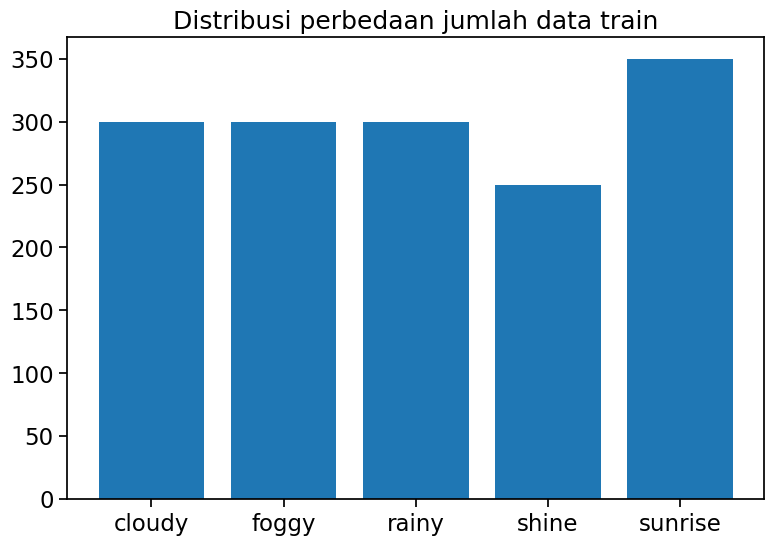

In [11]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('../weather_pred/Data/training/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribusi perbedaan jumlah data train')
plt.show()

In [12]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Jumlah gambar {}: '.format(i)+str(len(os.listdir('../weather_pred/Data/training/'+i+'/')))) 

Jumlah gambar cloudy: 300
Jumlah gambar foggy: 300
Jumlah gambar rainy: 300
Jumlah gambar shine: 250
Jumlah gambar sunrise: 350


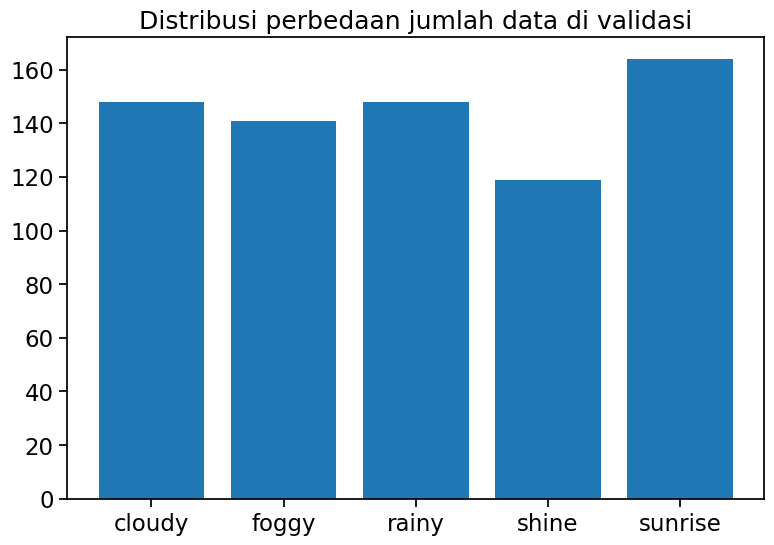

In [13]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('../weather_pred/Data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribusi perbedaan jumlah data di validasi')
plt.show()

In [14]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Jumlah gambar {} di validasi: '.format(i)+str(len(os.listdir('../weather_pred/Data/validation/'+i+'/')))) 

Jumlah gambar cloudy di validasi: 148
Jumlah gambar foggy di validasi: 141
Jumlah gambar rainy di validasi: 148
Jumlah gambar shine di validasi: 119
Jumlah gambar sunrise di validasi: 164
